<a href="https://colab.research.google.com/github/iamrosan/Fake-News-Detection-BCT-Mini-Project-/blob/lstm-pytorch/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !pip install pytorch-nlp
# !pip install tqdm --upgrade

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchnlp.encoders.text import SpacyEncoder, pad_tensor
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [5]:
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(0)

In [6]:
trueData = pd.read_csv('/content/drive/MyDrive/ProcessedData/processedTrue.csv')
fakeData = pd.read_csv('/content/drive/MyDrive/ProcessedData/processedFake.csv')

In [7]:
data = pd.concat([trueData, fakeData], ignore_index=True, sort=False)
data.head()

,Unnamed: 0,label,content
0,0,0,u budget fight loom republicans flip fiscal sc...
1,1,0,u military accept transgender recruit monday p...
2,2,0,senior u republican senator let mr mueller job...
3,3,0,fbi russia probe help australian diplomat tip ...
4,4,0,trump want postal service charge much amazon s...


In [8]:
data.columns = ['index', 'label', 'content']

In [9]:
data.head()

,index,label,content
0,0,0,u budget fight loom republicans flip fiscal sc...
1,1,0,u military accept transgender recruit monday p...
2,2,0,senior u republican senator let mr mueller job...
3,3,0,fbi russia probe help australian diplomat tip ...
4,4,0,trump want postal service charge much amazon s...


In [10]:
text_as_list = data['content'].tolist()
labels_as_list = data['label'].tolist()

In [11]:
encoder = SpacyEncoder(text_as_list)

In [12]:
encoded_texts = []
for i in tqdm(range(len(text_as_list))):
    encoded_texts.append(encoder.encode(text_as_list[i]))

  0%|          | 0/44877 [00:00<?, ?it/s]

In [13]:
lengths = [len(i) for i in tqdm(encoded_texts)]

  0%|          | 0/44877 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


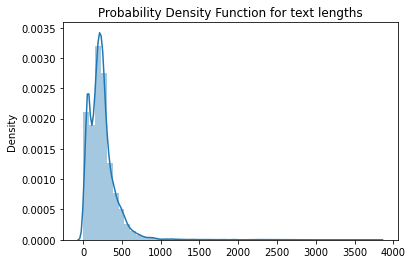

In [14]:
length_as_series = pd.Series(lengths)
plt.title("Probability Density Function for text lengths")
sns.distplot(length_as_series)

In [15]:
max_pad_length = length_as_series.quantile(0.9)

In [16]:
max_pad_length = 70

In [18]:
content = []
labels = []

for i in tqdm(range(len(encoded_texts))):
    if len(encoded_texts[i]) < max_pad_length:
        content.append(encoded_texts[i])
        labels.append(labels_as_list[i])
        
assert len(content) == len(labels), "The labels and feature lists should have the same time"

  0%|          | 0/44877 [00:00<?, ?it/s]

In [19]:
padded_dataset = []
for i in tqdm(range(len(content))):
    padded_dataset.append(pad_tensor(content[i], int(max_pad_length)))

  0%|          | 0/6361 [00:00<?, ?it/s]

In [20]:
X = torch.stack(padded_dataset)
y = torch.tensor(labels)

In [27]:
print((X))

tensor([[   75,   235,   405,  ...,     0,     0,     0],
        [ 1031,   308,  1032,  ...,     0,     0,     0],
        [  998,    75,   235,  ...,     0,     0,     0],
        ...,
        [ 6792,  2304,  4892,  ...,     0,     0,     0],
        [ 6792,  2304,    74,  ...,     0,     0,     0],
        [ 3062, 16292, 93524,  ...,     0,     0,     0]])


In [ ]:
X = X.numpy() 
y = y.numpy()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.25,
                                                    random_state=42)



TypeError: ignored

In [ ]:
y_train.head()

42075    1
18453    0
24093    1
42546    1
29920    1
Name: label, dtype: int64

In [ ]:
# #Using Vectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
# X_train = tfidf_vectorizer.fit_transform(X_train) 
# X_test = tfidf_vectorizer.transform(X_test)

In [ ]:
print(X_train)

  (0, 69425)	0.0432613799380485
  (0, 3091)	0.10123682879810678
  (0, 22379)	0.040534268162144345
  (0, 55326)	0.05295891338510217
  (0, 42046)	0.07198745450251297
  (0, 19170)	0.06077101115077565
  (0, 4375)	0.058960908296602395
  (0, 4377)	0.05159765035750504
  (0, 45872)	0.0472998624640903
  (0, 21960)	0.04945041182096181
  (0, 52347)	0.036143125339413176
  (0, 81108)	0.02424920923014958
  (0, 43825)	0.07076157742834063
  (0, 36211)	0.10123682879810678
  (0, 50022)	0.025750209652758295
  (0, 1234)	0.04561194768335777
  (0, 481)	0.05805948192845858
  (0, 2121)	0.03040920626514762
  (0, 942)	0.05921494360094778
  (0, 63277)	0.03060386452496806
  (0, 23311)	0.07125510466715469
  (0, 48016)	0.03323014999135495
  (0, 65714)	0.04776517865323853
  (0, 24946)	0.0632381258712215
  (0, 78612)	0.045506757156809075
  :	:
  (33656, 10994)	0.023131967118121315
  (33656, 72575)	0.021566318561986146
  (33656, 61713)	0.022723526507906305
  (33656, 62108)	0.02966161202214374
  (33656, 81847)	0.015987

In [ ]:
X_train, y_train = torch.tensor(X_train.shape[0]), torch.tensor(y_train.shape[0])
X_test, y_test = torch.tensor(X_test.shape[0]), torch.tensor(y_test.shape[0])

In [ ]:
print(X_test)

tensor(11220)


In [ ]:
# import math
# class NaiveCustomLSTM(nn.Module):
#     def __init__(self, input_sz: int, hidden_sz: int):
#         super().__init__()
#         self.input_size = input_sz
#         self.hidden_size = hidden_sz
        
#         #i_t
#         self.W_i = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
#         self.U_i = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
#         self.b_i = nn.Parameter(torch.Tensor(hidden_sz))
        
#         #f_t
#         self.W_f = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
#         self.U_f = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
#         self.b_f = nn.Parameter(torch.Tensor(hidden_sz))
        
#         #c_t
#         self.W_c = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
#         self.U_c = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
#         self.b_c = nn.Parameter(torch.Tensor(hidden_sz))
        
#         #o_t
#         self.W_o = nn.Parameter(torch.Tensor(input_sz, hidden_sz))
#         self.U_o = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz))
#         self.b_o = nn.Parameter(torch.Tensor(hidden_sz))
        
#         self.init_weights()
    
#     def init_weights(self):
#         stdv = 1.0 / math.sqrt(self.hidden_size)
#         for weight in self.parameters():
#             weight.data.uniform_(-stdv, stdv)
    
#     def forward(self,
#                 x,
#                 init_states=None):
        
#         """
#         assumes x.shape represents (batch_size, sequence_size, input_size)
#         """
#         bs, seq_sz, _ = x.size()
#         hidden_seq = []
        
#         if init_states is None:
#             h_t, c_t = (
#                 torch.zeros(bs, self.hidden_size).to(x.device),
#                 torch.zeros(bs, self.hidden_size).to(x.device),
#             )
#         else:
#             h_t, c_t = init_states
            
#         for t in range(seq_sz):
#             x_t = x[:, t, :]
            
#             i_t = torch.sigmoid(x_t @ self.W_i + h_t @ self.U_i + self.b_i)
#             f_t = torch.sigmoid(x_t @ self.W_f + h_t @ self.U_f + self.b_f)
#             g_t = torch.tanh(x_t @ self.W_c + h_t @ self.U_c + self.b_c)
#             o_t = torch.sigmoid(x_t @ self.W_o + h_t @ self.U_o + self.b_o)
#             c_t = f_t * c_t + i_t * g_t
#             h_t = o_t * torch.tanh(c_t)
            
#             hidden_seq.append(h_t.unsqueeze(0))
        
#         #reshape hidden_seq p/ retornar
#         hidden_seq = torch.cat(hidden_seq, dim=0)
#         hidden_seq = hidden_seq.transpose(0, 1).contiguous()
#         return hidden_seq, (h_t, c_t)

In [ ]:
import math
class CustomLSTM(nn.Module):
    def __init__(self, input_sz, hidden_sz):
        super().__init__()
        self.input_sz = input_sz
        self.hidden_size = hidden_sz
        self.W = nn.Parameter(torch.Tensor(input_sz, hidden_sz * 4))
        self.U = nn.Parameter(torch.Tensor(hidden_sz, hidden_sz * 4))
        self.bias = nn.Parameter(torch.Tensor(hidden_sz * 4))
        self.init_weights()
                
    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.hidden_size)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)
         
    def forward(self, x, 
                init_states=None):
        """Assumes x is of shape (batch, sequence, feature)"""
        bs, seq_sz, _ = x.size()
        hidden_seq = []
        if init_states is None:
            h_t, c_t = (torch.zeros(bs, self.hidden_size).to(x.device), 
                        torch.zeros(bs, self.hidden_size).to(x.device))
        else:
            h_t, c_t = init_states
         
        HS = self.hidden_size
        for t in range(seq_sz):
            x_t = x[:, t, :]
            # batch the computations into a single matrix multiplication
            gates = x_t @ self.W + h_t @ self.U + self.bias
            i_t, f_t, g_t, o_t = (
                torch.sigmoid(gates[:, :HS]), # input
                torch.sigmoid(gates[:, HS:HS*2]), # forget
                torch.tanh(gates[:, HS*2:HS*3]),
                torch.sigmoid(gates[:, HS*3:]), # output
            )
            c_t = f_t * c_t + i_t * g_t
            h_t = o_t * torch.tanh(c_t)
            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        # reshape from shape (sequence, batch, feature) to (batch, sequence, feature)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()
        return hidden_seq, (h_t, c_t)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.embedding = nn.Embedding(len(encoder.vocab)+1, 32)
        self.lstm = CustomLSTM(32,32)#nn.LSTM(32, 32, batch_first=True)
        self.fc1 = nn.Linear(32, 2)
        
    def forward(self, x):
        x_ = self.embedding(x)
        x_, (h_n, c_n) = self.lstm(x_)
        x_ = (x_[:, -1, :])
        x_ = self.fc1(x_)
        return x_

In [ ]:
# ds_train = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader((X_train, y_train), batch_size=128, shuffle=True)

# ds_test = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader((X_test, y_test), batch_size=256, shuffle=True)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classifier = Net().to(device)
optimizer = optim.Adam(classifier.parameters(), lr=0.005)#0.002 dives 85% acc
criterion = nn.CrossEntropyLoss()

AttributeError: ignored

In [ ]:
epoch_bar = tqdm(range(10),
                 desc="Training",
                 position=0,
                 total=2)

acc = 0

for epoch in epoch_bar:
    batch_bar = tqdm(enumerate(train_loader),
                     desc="Epoch: {}".format(str(epoch)),
                     position=1,
                     total=len(train_loader))
    
    for i, (datapoints, labels) in batch_bar:
        
        optimizer.zero_grad()
        
        preds = classifier(datapoints.long().to(device))
        loss = criterion(preds, labels.to(device))
        loss.backward()
        optimizer.step()
        #acc = (preds.argmax(dim=1) == labels).float().mean().cpu().item()
        
        if (i + 1) % 50 == 0:
            acc = 0
            
            with torch.no_grad():
                for  i, (datapoints_, labels_) in enumerate(test_loader):
                    preds = classifier(datapoints_.to(device))
                    acc += (preds.argmax(dim=1) == labels_.to(device)).float().sum().cpu().item()
            acc /= len(X_test)

        batch_bar.set_postfix(loss=loss.cpu().item(),
                              accuracy="{:.2f}".format(acc),
                              epoch=epoch)
        batch_bar.update()

        
    epoch_bar.set_postfix(loss=loss.cpu().item(),
                          accuracy="{:.2f}".format(acc),
                          epoch=epoch)
    epoch_bar.update()

Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch: 0:   0%|          | 0/1 [00:00<?, ?it/s]

ValueError: ignored